# COVID-19 Genome Analysis using Biopython

## Context
- Fetching COVID-19 genome from NCBI
- COVID-19 genome (MN908947) used here was sequenced from bronchiolar lavage fluid of a patient in Wuhan, China on 26 December 2019

### Fetching the genome 

In [1]:
from Bio import Entrez, SeqIO
Entrez.email = "" 
handle = Entrez.efetch(db="nucleotide", id="MN908947", rettype="gb", retmode="text")
recs = list(SeqIO.parse(handle, 'gb'))
handle.close()

In [2]:
recs

[SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='MN908947.3', name='MN908947', description='Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[])]

In [3]:
covid_dna = recs[0].seq
covid_dna

Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA')

In [4]:
print(f'The genome of Covid-19 consists of {len(covid_dna)} nucleotides.')

The genome of Covid-19 consists of 29903 nucleotides.


In [5]:
# molecular weight
from Bio.SeqUtils import molecular_weight
molecular_weight(covid_dna)

9241219.214400413

In [6]:
# GC content - higher GC content implies more stable molecule due to G and C forming triple hydrogen bonds
from Bio.SeqUtils import GC
GC(covid_dna)

37.97277865097148

### Distribution of nucleotides in COVID-19 genome

In [7]:
count_nucleotides = {
    'A': covid_dna.count('A'),
    'T': covid_dna.count('T'),
    'C': covid_dna.count('C'),
    'G': covid_dna.count('G')
}

In [8]:
count_nucleotides

{'A': 8954, 'T': 9594, 'C': 5492, 'G': 5863}

Text(0.5, 1.0, 'Nucleotide Frequency')

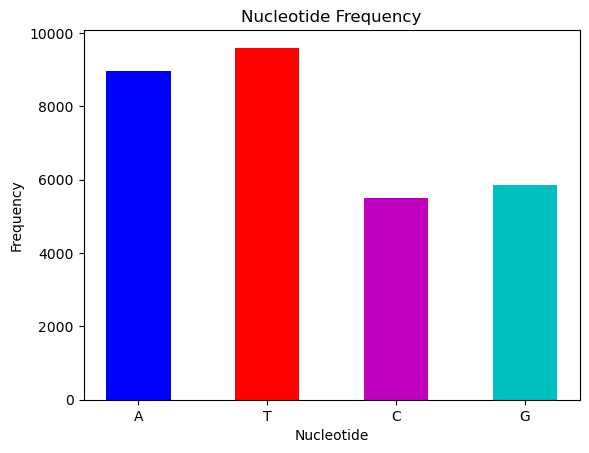

In [9]:
import matplotlib.pyplot as plt
width = 0.5
plt.bar(count_nucleotides.keys(), count_nucleotides.values(), width, color=['b', 'r', 'm', 'c'])
plt.xlabel('Nucleotide')
plt.ylabel('Frequency')
plt.title('Nucleotide Frequency')

Interpretation: The A, T content is comparatively higher than the G, C content, which ultimately affects the stability of the genome.

### Transcription

### Translation

## Summary:

# Finish!